**Algoritmo k-means**


1.   Especificar el número *k* de *clusters* a asignar.
2.   Iniciar aleatoriamente *k* centroides.
3.   **Repetir**
> 4. **Espectativa:** Asignar cada punto a su centroide más cercano.
> 5. **Maximización:** Calcular el nuevo centroide (media) de clada *cluster*.
6.   **Hasta que** La posición del centroide no cambie.





In [1]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
print(df.columns)

Index(['ID', 'fec_not', 'semana', 'año', 'edad_', 'uni_med_', 'sexo_',
       'cod_pais_o', 'cod_dpto_o', 'cod_mun_o', 'area_', 'ocupacion_',
       'tip_ss_', 'cod_ase_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela', 'gp_gestan', 'gp_calle', 'gp_psiquia', 'gp_vic_vio',
       'fecha_contagio', 'inicio_sintomas', 'pac_hos_', 'fec_hos_',
       'condicion_final', 'fecha_defuncion', 'fecha_nacimiento',
       'certif_defuncion', 'familiar_sintomas', 'fiebre', 'cefalea',
       'dolor_retroocular', 'mialgias', 'artralgia', 'erupcion',
       'dolor_abdomen', 'vomito', 'diarrea', 'somnolencia', 'hipotension',
       'hepatomegalia', 'hemorragia_mucosa', 'hipotermia', 'caida_plaquetas',
       'acum_liquido', 'aum_hematocrito', 'conducta', 'latitud', 'longitud'],
      dtype='object')


In [20]:
# Eliminar las filas con valores faltantes
df = df.dropna()


In [11]:
# Convertir la columna 'sexo_' a valores numéricos
df["sexo_"] = df["sexo_"].replace({"F": 1, "M": 0})
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,1,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,0,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,0,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,1,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,1,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,1,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,0,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,0,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,1,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [12]:
# Normalizar los datos
X = df[['sexo_', 'latitud', 'longitud']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

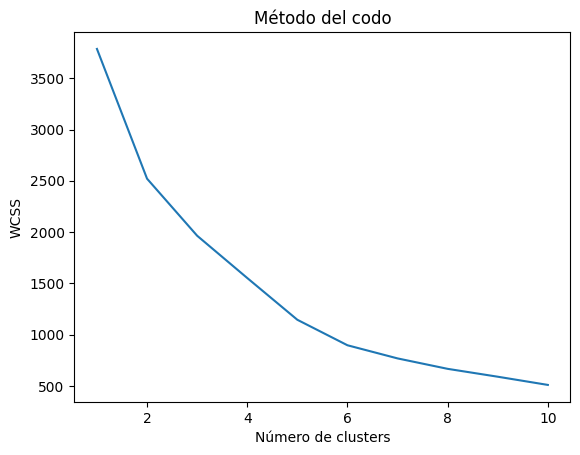

In [13]:
# Aplicar KMeans y calcular el codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_scaled)
df['cluster'] = kmeans.labels_

In [17]:
# Imprimir el número de eventos en cada cluster
print(df.groupby('cluster').size())


cluster
0    657
1    605
dtype: int64


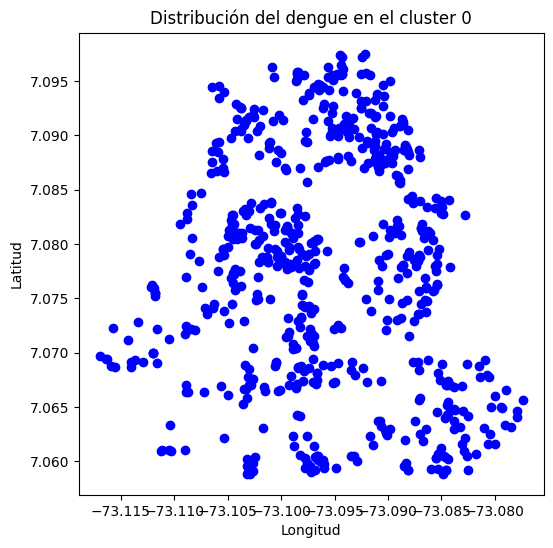

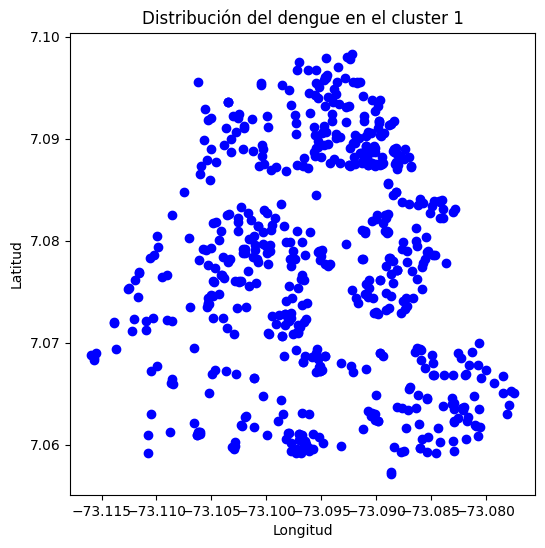

In [18]:
df['cluster'] = pred_y
for i in range(0, 2):
    cluster_data = df[df['cluster'] == i]
    plt.figure(figsize=(6,6))
    plt.scatter(cluster_data['longitud'], cluster_data['latitud'], c='blue')
    plt.title(f'Distribución del dengue en el cluster {i}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()


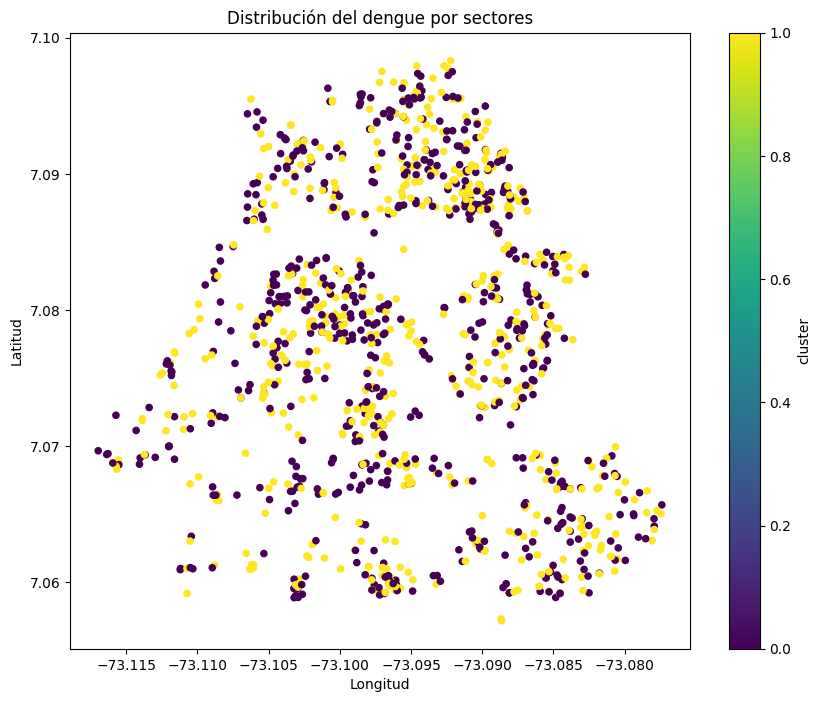

In [19]:
# Visualizar los clusters por sectores
df['cluster'] = pred_y
df.plot(kind='scatter', x='longitud', y='latitud', c='cluster', cmap='viridis', figsize=(10,8))
plt.title('Distribución del dengue por sectores')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()